# Анализ А/В теста крупного интернет-магазина

***
*В нашем распоряжении данные крупного интернет-магазина. А также список гипотез для увеличения выручки, подготовленных совместно с отделом маркетинга.*

***Цель исследования*** *- приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.*

***Ход исследования:***

***1.*** *Приоритизация гипотез методами ICE и RICE, сравнение результатов показателей*

***2.*** *Подготовка данных*

***3.*** *Анализ А/Б теста*

***3.*** *Вывод*

***

## Приоритизация гипотез

In [1]:
import pandas as pd                                                                         # импортируем библиотеку pandas
import matplotlib.pyplot as plt                                                         # импортируем библиотеку matplotlib
import datetime as dt                                                              # импортируем модуль для работы с датами
import numpy as np                                                                           # импортируем библиотеку numpy
from scipy import stats as st                                                                # импортируем библиотеку scipy
import scipy.stats as stats

In [2]:
try:                                                                                                  # открываем датафрейм
    hypotheses = pd.read_csv('')                                    
except: 
    hypotheses = pd.read_csv('')
pd.set_option('display.max_colwidth',None)                            #приведем к виду отображения всех столбцоф датафрейма
hypotheses.columns = map(str.lower, hypotheses.columns)
hypotheses.head()                                                                       # выведем первые пять строк таблицы

,hypothesis,reach,impact,confidence,efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1


In [3]:
hypotheses['ICE'] = round(((hypotheses['impact']*hypotheses['confidence'])/ hypotheses['efforts']),1)#рассчитываем ICE 
hypotheses[['hypothesis', 'ICE']].sort_values(by='ICE', ascending = False)             # отсортируем параметр по убыванию

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.2
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.1
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.0


In [4]:
#рассчитываем парамерт RICE для определения приоритетности гипотез
hypotheses['RICE'] = (hypotheses['impact']*hypotheses['confidence']*hypotheses['reach'])/ hypotheses['efforts']
hypotheses[['hypothesis', 'RICE']].sort_values(by='RICE', ascending = False)         # отсортируем параметр по убыванию

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


In [5]:
#выведем одновременно результаты и RICE и ICE для удобства сравнения
hypotheses[['hypothesis', 'RICE', 'ICE']].sort_values(by='RICE', ascending = False)      

,hypothesis,RICE,ICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0,11.2
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0,7.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0,13.3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0,8.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0,1.1
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0,2.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0,1.3
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0,1.0


***
***Вывод:*** *При применении метода ICE на первых трех местах оказались гипотезы с индексами 8, 0 и 7 соответственно. После применения метода приоретизации RICE на первых трех местах оказались гипотезы с индексами 7, 2 и 0. Мы наблюдаем смену приоритетных гипотез, так как во втором методе дополнительно учитывается параметр reach — охват пользователей, на которых повлияет изменение.*
***

## Получение  и предобработка данных

In [6]:
# импортируем данные 
try:
    orders = pd.read_csv('/datasets/orders.csv')
except:
    orders = pd.read_csv('https://code.s3.yandex.net/datasets/orders.csv')

orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [7]:
try:
    visitors = pd.read_csv('')
except:
    visitors = pd.read_csv('')

visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
# проверим типы данных в колонках
df = [orders,visitors]
for i in df:
    print(i.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB
None


In [9]:
# приведем данные с датой к нужному типу
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [10]:
#приведем назания столбцов к нижнему регистру
orders.columns = orders.columns.str.lower()

In [11]:
# приведем названия колонок к формату snake_case
orders = orders.rename(columns={'transactionid':'transaction_id','visitorid':'visitor_id'})

In [12]:
# проверим пропуски в таблицах
for i in df:
    print(i.isna().sum())   

transactionid    0
visitorid        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


In [13]:
# проверим полные дубликаты в таблицах
for i in df:
    print (i.duplicated().sum())

0
0


In [14]:
# проверим количество посетителей в каждой группе 
group_a = visitors.query('group == "A"')['visitors'].sum() 
group_b = visitors.query('group == "B"')['visitors'].sum() 
 
(group_b/(group_a+group_b))*100 - (group_a/(group_a+group_b))*100

0.4780622543291173

Отличие между группами в пользователях менее 1%. Группы можно считать равноценными. Убедимся, что в каждую группу попали уникальные пользователи.

In [15]:
# найдем уникальные id пользователей в каждой группе
unique_id_list_A = orders.query('group == "A"')['visitor_id'].unique().tolist()
unique_id_list_B = orders.query('group == "B"')['visitor_id'].unique().tolist()
unique_id_dublicated = []

# проверим совпадения пользователей в группах
for x in unique_id_list_A:
    if x in unique_id_list_B:
        unique_id_dublicated.append(x)
print('Количество пользователей, которые попали в обе группы', len(unique_id_dublicated))

Количество пользователей, которые попали в обе группы 58


In [16]:
# Посчитаем долю этих пользователей от общего числа тестируемых
len(unique_id_dublicated)/len(orders['visitor_id'].unique())*100

5.625606207565471

Некоторые покупатели попали сразу в обе группы. Их количество незначительно (5,6%), можно оставить этих покупателей в тесте, так как если мы удалим их, это скажется на дальнейших расчетах. Тем более, что удалить этих пользоватей из второй таблицы мы не сможем, нет возможности найти их id.

In [17]:
# выясним дату начала теста
visitors['date'].min()

Timestamp('2019-08-01 00:00:00')

In [18]:
# выясним дату конца теста
visitors['date'].max()

Timestamp('2019-08-31 00:00:00')

In [19]:
# посчитаем сколько дней длился тест
print(visitors['date'].max() - visitors['date'].min())

30 days 00:00:00


In [20]:
# выведем на экран первые пять строк таблиц
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [21]:
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


 ***
***Вывод:*** *В нашем распоряжении данные с результатами проведенных А/В тестов крупного интернет - магазина.* 

***Таблица orders:***
* transaction_id — идентификатор заказа;
* visitor_id — идентификатор пользователя, совершившего заказ;
* date — дата, когда был совершён заказ;
* revenue — выручка заказа;
* group — группа A/B-теста, в которую попал заказ.

***Таблица visitors:***

* date — дата;
* group — группа A/B-теста;
* visitors — количество пользователей в указанную дату в указанной группе A/B-теста

***По итогу предобработки данных:***
* Привели названия столбцов к нужному виду.
* Преобразовали данных о датах.
* Проверили данные на дубликаты и пропуски.
* Выснили, что тест проходил 30 дней. С 1 по 31 августа 2019 года.
* Посчитали количество пользователей в группах. Различия составляют не более, чем 1%.
* Обнаружили пользователей, которые попали в обе группы, их количество составляет 5,6% от общего числа уникальных пользователей. Решили оставить исходные данные, так как не сможем удалить этих пользователей из двух датафреймов. 
***

##  Анализ A/B-теста

### График кумулятивной выручки по группам

Чтобы отслеживать изменения результатов эксперимента на каждый день тестирования, составим датафрейм с кумулятивными данными. 

In [22]:
# создаем массив уникальных пар значений дат и групп теста
datesGroups  = orders[['date', 'group']].drop_duplicates()

# получаем агрегированные кумулятивные по дням данные о заказах
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'],\
                                                                     orders['group'] == x['group'])]\
                                     .agg({'date' : 'max', 'group' : 'max', 'transaction_id' : 'nunique', \
                                           'visitor_id' : 'nunique', 'revenue' : 'sum'}), axis=1)\
                                     .sort_values(by=['date','group'])

#получим агрегированные кумулятивные по дням данные о посетителях интернет-магазина:
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'],\
                                                                         visitors['group'] == x['group'])]\
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1)\
                                       .sort_values(by=['date','group'])

# объединяем кумулятивные данные в одной таблице и присваиваем ее столбцам понятные названия
cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,148579,719
1,2019-08-01,B,21,20,101217,713
2,2019-08-02,A,44,38,242401,1338
3,2019-08-02,B,45,43,266748,1294
4,2019-08-03,A,68,62,354874,1845


Перед нами таблица со столбцами:
* date — дата;
* group — группа A/B-теста (A или B);
* orders — кумулятивное количество заказов на указанную дату в указанной группе;
* buyers — кумулятивное количество пользователей, совершивших хотя бы один заказ, на указанную дату в указанной группе;
* revenue — кумулятивная выручка на указанную дату в указанной группе (средний чек);
* visitors — кумулятивное количество посетителей интернет-магазина на указанную дату в определённой группе.

In [23]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueA.head()

,date,revenue,orders
0,2019-08-01,148579,24
2,2019-08-02,242401,44
4,2019-08-03,354874,68
6,2019-08-04,425699,84
8,2019-08-05,549917,109


In [24]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]
cumulativeRevenueB.head()

,date,revenue,orders
1,2019-08-01,101217,21
3,2019-08-02,266748,45
5,2019-08-03,380996,61
7,2019-08-04,489567,78
9,2019-08-05,581995,101


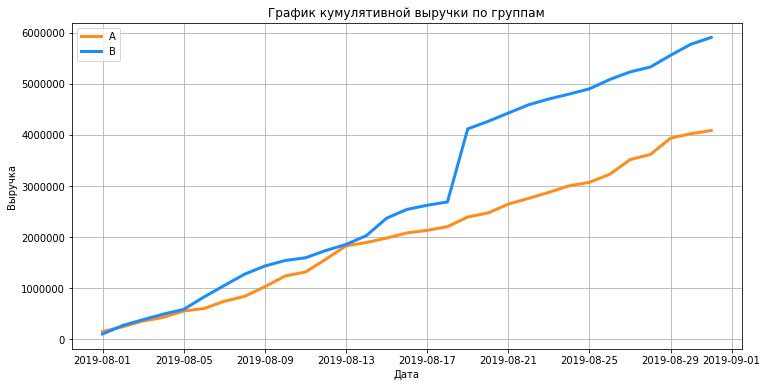

In [25]:
plt.rcParams ['figure.figsize'] = [12, 6]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A',color = '#ff8d1a', linewidth= 3)

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B', linewidth= 3, color='#1a8cff')


plt.legend()
plt.ticklabel_format(style='plain', axis='y')
plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid()
plt.show()

***
***Вывод:*** *Выручка почти равномерно увеличивается в течение всего теста. Однако график группы В в одной точке резко начинает расти, и все остальное время значительно превышае группу А. Это может сигнализировать о всплесках числа заказов, либо о появлении очень дорогих заказов в выборке.*
***

### График кумулятивного среднего чека по группам

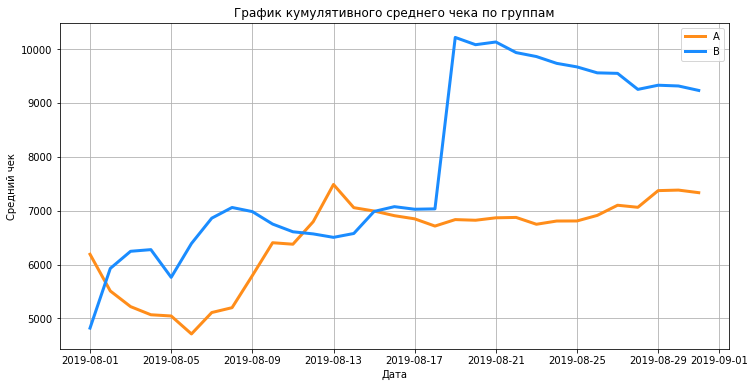

In [26]:
# Построим график среднего чека по группам

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'],
         label='A',color = '#ff8d1a', linewidth= 3)

plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'],
         label='B', linewidth= 3, color='#1a8cff')

plt.legend()
plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.ylabel('Средний чек')
plt.grid()
plt.show()

***
***Вывод:*** *Средний чек в группе В и здесь имеет резкий скачок и в дальнейшим показатели намного превышают цифры группы А. Возможно попали крупные заказы, что существенно искажает выводы. Требуется дополнительный анализ выбросов.*
***

### График относительного изменения кумулятивного среднего чека группы B к группе A

In [27]:
# собираем данные в одном датафрейме
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, 
                                                   left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeRevenue.head()

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,148579,24,101217,21
1,2019-08-02,242401,44,266748,45
2,2019-08-03,354874,68,380996,61
3,2019-08-04,425699,84,489567,78
4,2019-08-05,549917,109,581995,101


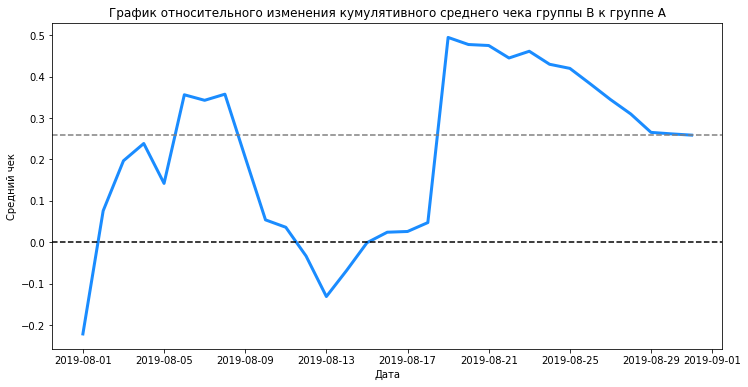

In [28]:
# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'],(mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])\
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1,\
        color = '#1a8cff', linewidth= 3)

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.26, color='grey', linestyle='--')
plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Средний чек')

plt.show()

***
***Вывод:*** *На графики ярко видно, что показатели отношений среднего чека  групп резко менялись несколько раз. Видимо как раз в эти даты и были сделаны аномально крупные покупки в группе В. Необходимо найти выбросы в данных.*
****

### График график кумулятивного среднего количества заказов на посетителя по группам

In [29]:
# считаем кумулятивное среднее количество заказов на посетителя
cumulativeData['ratio'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,ratio
0,2019-08-01,A,24,20,148579,719,0.033380
1,2019-08-01,B,21,20,101217,713,0.029453
2,2019-08-02,A,44,38,242401,1338,0.032885
3,2019-08-02,B,45,43,266748,1294,0.034776
4,2019-08-03,A,68,62,354874,1845,0.036856


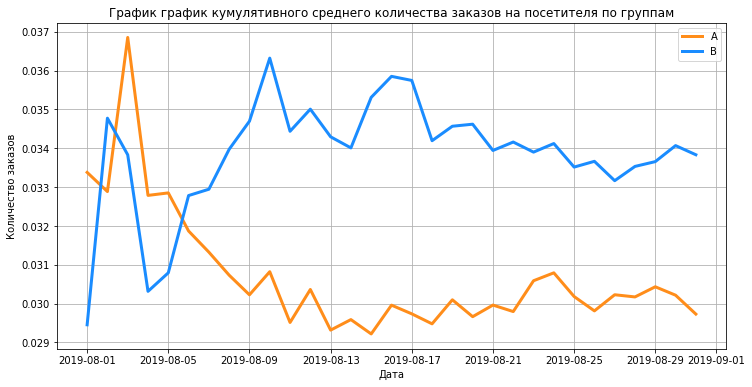

In [30]:
# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['ratio'], label='A', color = '#ff8d1a', linewidth= 3)
plt.plot(cumulativeDataB['date'], cumulativeDataB['ratio'], label='B', linewidth= 3, color='#1a8cff')

plt.legend()
plt.grid()
plt.title('График график кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')

plt.show()
#plt.axis(["2019-08-01", "2019-08-31", 0, 0.040]) - не могу дабавить параметр, пожалуйста, подскажите как это сделать
# появляется еще одна пустая рамка для графика.

***
***Вывод:*** *В начале графика количество заказов на посетителя групп меняли лидерские позиции, но после 5 августа показатели группы В продолжали расти, а показатели группы А - падать. В итоге количество заказов группы А оказалось в пределах 0,029-0,030% . Количетво заказов группы В закрепилась примерно на уровне показателей 0,033-0,034%.*
***

### График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

In [31]:
mergedCumulativeratios = cumulativeDataA[['date','ratio']].merge(cumulativeDataB[['date','ratio']],
                                                                           left_on='date', 
                                                                           right_on='date', how='left', suffixes=['A', 'B'])
mergedCumulativeratios.head()

,date,ratioA,ratioB
0,2019-08-01,0.033380,0.029453
1,2019-08-02,0.032885,0.034776
2,2019-08-03,0.036856,0.033833
3,2019-08-04,0.032787,0.030315
4,2019-08-05,0.032851,0.030793


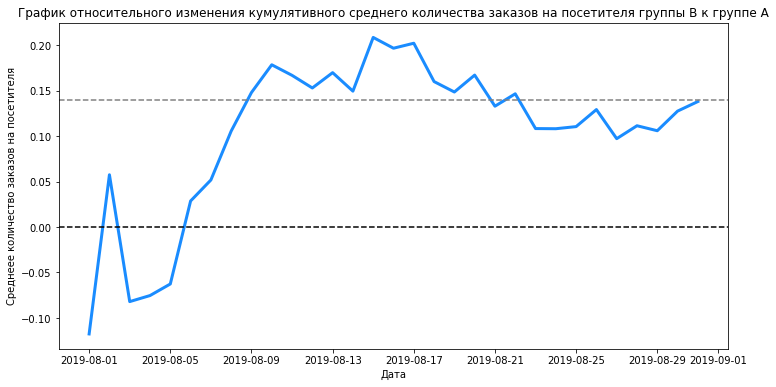

In [32]:
plt.plot(mergedCumulativeratios['date'], 
         mergedCumulativeratios['ratioB']/mergedCumulativeratios['ratioA']-1,
        linewidth= 3, color='#1a8cff')


plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.14, color='grey', linestyle='--') 
plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')
plt.ylabel('Cреднеее количество заказов на посетителя')
plt.show()

***
***Вывод:*** *Среднее количество заказов в начале теста было не стабильно  в группах относительно друг друга.После 5 августа показатель в группе В резко вырос, а в группе А упал. График отношений после этой даты показывает результаты в пользу группы В и к концу теста достигает уровня 0,15 %.* 
***

###  Точечный график количества заказов по пользователям

In [33]:
# подсчитаем количество заказов по пользователям и посмотрим на результат

ordersByUsers = (
    orders.groupby('visitor_id', as_index=False)
    .agg({'transaction_id': 'nunique'})
)

ordersByUsers.columns = ['user_id', 'orders']

ordersByUsers.sort_values(by='orders', ascending=False).head(10)

,user_id,orders
1023,4256040402,11
591,2458001652,11
569,2378935119,9
487,2038680547,8
44,199603092,5
744,3062433592,5
55,237748145,5
917,3803269165,5
299,1230306981,5
897,3717692402,5


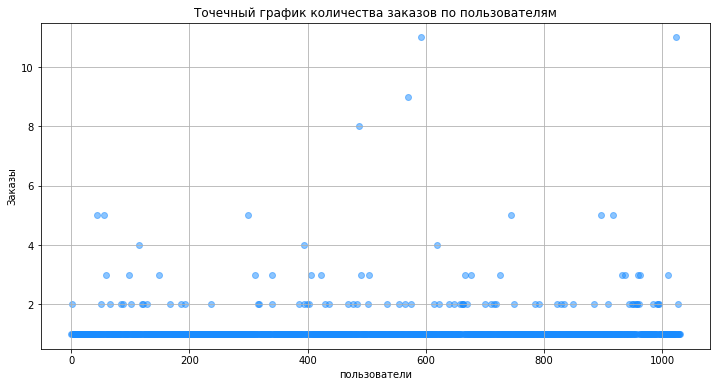

In [34]:
# построим точечную диаграмму числа заказов на одного пользователя

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'], alpha = 0.5, color='#1a8cff') 

plt.title('Точечный график количества заказов по пользователям')
plt.xlabel('пользователи')
plt.ylabel('Заказы')
plt.grid()
plt.show()

***
***Вывод:*** *По графику видно, что чаще всего покупатели совершают от 1-2 заказа. Но также мы нашли пользователей, которые делаю от 5 до 11 покупок. Доля их неясна, продолжим исследование, чтобы точно выяснить каков их процент.*
***

### Перцентили количества заказов на пользователя

In [35]:
# посчитаем 95-й и 99-й перцентили стоимости заказов
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[2. 4.]


***
***Вывод:*** *Не более 5% посетителей интренет-магазина делали более двух заказов и не более 1% посетителей более 4-х заказов. Выберем 4 заказа границей для определения аномальных пользователей.*
***

### Точечный график стоимостей заказов 

In [36]:
# Посмотрим на ТОП-10 максимальных по стоимости заказов
orders.sort_values(by='revenue', ascending=False).head(10)

,transaction_id,visitor_id,date,revenue,group
425,590470918,1920142716,2019-08-19,1294500,B
1196,3936777065,2108080724,2019-08-15,202740,B
858,192721366,1316129916,2019-08-27,93940,A
1136,666610489,1307669133,2019-08-13,92550,A
744,3668308183,888512513,2019-08-27,86620,B
682,1216533772,4266935830,2019-08-29,78990,B
662,1811671147,4266935830,2019-08-29,78990,A
743,3603576309,4133034833,2019-08-09,67990,A
1103,1348774318,1164614297,2019-08-12,66350,A
1099,316924019,148427295,2019-08-12,65710,A


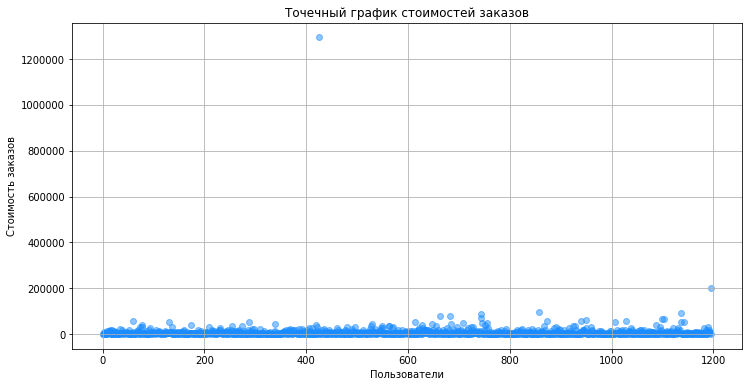

In [37]:
# посмотрим распределение стоимости заказов
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha = 0.5, color='#1a8cff') 

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.ticklabel_format(style='plain', axis='y')
plt.grid()
plt.show()

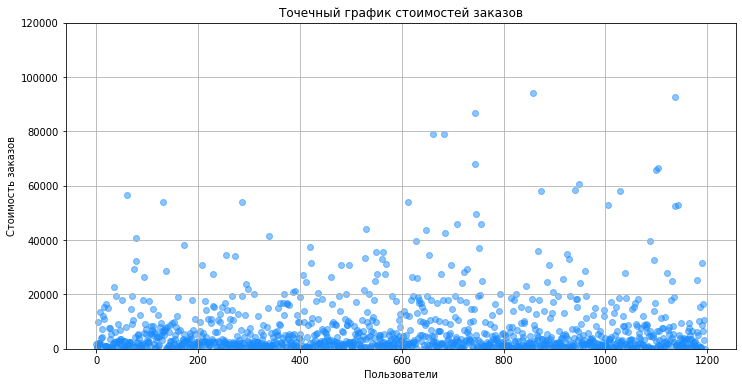

In [38]:
# посмотрим распределение стоимости заказов без выброса
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha = 0.5, color='#1a8cff') 

plt.title('Точечный график стоимостей заказов')
plt.xlabel('Пользователи')
plt.ylabel('Стоимость заказов')
plt.ticklabel_format(style='plain', axis='y')
plt.ylim(0, 120000)
plt.grid()
plt.show()

***
***Вывод:*** *График нам показывает, что чаще всего пользователи делают покупки суммой до 15000 рублей. Но невозможно не обратить внимания на покупателя с  ID 1920142716, который совершил покупку на 1294500 рублей. Большая часть заказов совершается стоимостью до 20000 рублей. Есть небольшая часть заказов от 20000 до 60000 рублей. Нужно точно выяснить какова их доля.*
***

### Перцентили стоимости заказов

In [39]:
# посчитаем 95-й и 99-й перцентили стоимости заказов
print(np.percentile(orders['revenue'], [95, 99]))

[28000.  58233.2]


***
***Вывод:*** *Не более 5% покупок в интренет-магазине совершается со стоимостью более 28000 рублей и не более 1% покупок более 58233.2 рублей. Выберем 58000 границей для определения аномальных заказов.*
***

### Различия в среднем количестве заказов на посетителя по сырым данным



Посчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным. 
Сформулируем гипотезы. 
Нулевая: различий в среднем количестве заказов между группами нет. 
Альтернативная: различия в среднем между группами есть.

In [40]:
# Определим посетителей для каждой группы
visitorsPerDateA = visitors.query('group= = "A"')
visitorsPerDateB = visitors.query('group= = "B"')

Создадим переменные ordersByUsersA и ordersByUsersB со столбцами ['visitor_id', 'orders']. В них для пользователей, которые заказывали хотя бы 1 раз, укажем число совершённых заказов. 

In [41]:
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitor_id', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitor_id', 'orders']

Объявим переменные sampleA и sampleB, в которых пользователям из разных групп будет соответствовать количество заказов. Тем, кто ничего не заказал, будут соответствовать нули. 

In [42]:
sampleA = pd.concat(
    [
        ordersByUsersA['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDateA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleB = pd.concat(
    [
        ordersByUsersB['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDateB['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Ранее мы наблюдали графическое отображение выбросов в данных. Дополнительно проверим распределения выборок на нормальность, применив критерий Шапиро-Уилка.

In [43]:
# проверим нормальность распределения в среднем количестве заказов на посетителя по сырым данным в группе А
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sampleA)
p_value = results[1]                 

print('p-значение:', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение: 0.0
Отвергаем нулевую гипотезу: распределение не нормально


/opt/conda/lib/python3.9/site-packages/scipy/stats/_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [44]:
# проверим нормальность распределения количество заказов по пользователям 
alpha = 0.05  # критический уровень статистической значимости

results = st.shapiro(sampleB)
p_value = results[1]

print('p-значение:', p_value)

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: распределение не нормально')
else:
    print('Не получилось отвергнуть нулевую гипотезу, всё нормально') 

p-значение: 0.0
Отвергаем нулевую гипотезу: распределение не нормально


Поскольку в наших данных есть выбросы и они сотоят из двух независимых выборок, применим метод st.mannwhitneyu().
Определим уровень статистической значимости alpha = 0.05

In [45]:
print('Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным:',"{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))
print('Относительный прирост среднего числа заказов группы B к группе А:',"{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным: 0.017
Относительный прирост среднего числа заказов группы B к группе А: 0.138


***
***Вывод:*** *По сырым данным P-value 0,017 значительно меньше alpha. Мы можем отвергнуть нулевую гипотезу - различия в среднем количестве заказов между группами есть. Относительный прирост среднего числа заказов группы B - 13,8%. Посмотрим повлиял ли на этот результат выброс в дальнейших расчетах.*
***

### Различия в среднем чеке заказа между группами по «сырым» данным

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
Нулевая гипотеза: различий в среднем чеке между группами нет. Альтернативная гипотеза: различия в среднем чеке между группами есть. И найдём относительные различия в среднем чеке между группами.

In [46]:
print('Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным:','{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print('Относительные различия в среднем чеке между группами В и А:','{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

Cтатистическая значимость различий в среднем чеке заказа между группами по «сырым» данным: 0.729
Относительные различия в среднем чеке между группами В и А: 0.259


***
***Вывод:*** *P-value 0.729 значительно больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Впрочем, средний чек группы B  выше среднего чека группы A на 25,9%. Возможно опять причиной тому выбросы в даных.*
***

###  Различия в среднем количестве заказов на посетителя между группами по «очищенным» данным

Сосчитаем статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным. 

Ранее мы выяснили, что не более 5% посетителей интренет-магазина делали более двух заказов и не более 1% посетителей более 4-х заказов. Выберем 4 заказа границей для определения аномальных пользователей.
 Так же не более 5% покупок в интренет-магазине совершается со стоимостью более 28000 рублей и не более 1% покупок более 58233.2 рублей. Выберем 58233.2  границей для определения аномальных заказов.

Сделаем срезы пользователей с числом заказов больше 4 — usersWithManyOrders и пользователей, совершивших заказы дороже 58233.2 — usersWithExpensiveOrders. Объединим их в таблице abnormalUsers. 

In [47]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > int(np.percentile(ordersByUsers['orders'], [99]))]['visitor_id'],
        ordersByUsersB[ordersByUsersB['orders'] > int(np.percentile(ordersByUsers['orders'], [99]))]['visitor_id'],
    ],
    axis=0,
)
usersWithExpensiveOrders = orders[orders['revenue'] > int(np.percentile(orders['revenue'], [99]))]['visitor_id']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print('Количетво пользователей, совершивших более 4 покупок или потративших сумму более 58233.2 рублей:',abnormalUsers.shape[0])

Количетво пользователей, совершивших более 4 покупок или потративших сумму более 58233.2 рублей: 15


Мы получили 14 аномальнх пользователей. Проверим, какую роль сыграли эти аномали в тесте. Посчитаем статистическую значимость различий в среднем количестве заказов между группами теста по очищенным данным. Сначала подготовим выборки количества заказов по пользователям по группам теста.

In [48]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDateA['visitors'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['visitor_id'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                visitorsPerDateB['visitors'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

Применим статистический критерий Манна-Уитни к полученным выборкам. alpha = 0.05. Нулевая гипотеза: различий в среднем количестве заказов между группами нет. Альтернативная: различия в среднем между группами есть.

In [49]:
print('Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:''{0:.3f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('Относительный прирост среднего числа заказов группы B к А:','{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

Cтатистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным:0.014
Относительный прирост среднего числа заказов группы B к А: 0.153


***
***Вывод:*** *По очищенным от выбросов данным P-value 0,014 также как и по сырым значительно меньше 0.05. Мы и тут можем отвергнуть нулевую гипотезу - различия в среднем между группами есть. Относительный прирост среднего числа заказов группы B увеличолось  - 15,3%.*
***

### Различия в среднем чеке заказа между группами по «очищенным» данным.

Посчитаем статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным. 
Н0: различий в среднем чеке между группами нет. 
Н1: различия в среднем чеке между группами есть. 

In [50]:
print('Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным:',
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print('Относительные различия в среднем чеке между группами В и А:',
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitor_id'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
) 

Cтатистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным: 0.851
Относительные различия в среднем чеке между группами В и А: -0.006


***
***Вывод:*** *P-value 0,851 как и раньше больше 0.05. Значит, причин отвергать нулевую гипотезу и считать, что в среднем чеке есть различия, нет. Вто же время, средний чек группы B стал ниже, чем у группы А на 0,6%. Удаление выбросов весомо поняло картину в среднем чеке.*
***

## Вывод

***
***В нашем распоряжении были данные с результатами проведенного А/В тестов крупного интернет - магазина.***

*По итогу нашего исследования методами ICE RICE мы определили две приоритетные гипотезы по увеличению выручки интернет-магазина:*

***1.***  *Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок*

***2.***  *Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей*
    
***Мы исследовали данные и нашли в них некоторые особенности:***

* *Тест проходил 30 дней. С 1 по 31 августа 2019 года*

* *Различие количества пользователей составляют не более, чем 1%.*

* *Обнаружили пользователей, которые попали в обе группы, их количество составляет 5,6% от общего числа уникальных пользователей. Решили оставить исходные данные, так как не сможем удалить этих пользователей из двух датафреймов.*

***Проанализировали результаты A/B-теста:***

*  *Различия в среднем количестве заказов между группами есть. По сырым данным P-value 0,017 , по очищенным - 0,014. Оба показателя значительно меньше alpha 0,05. Относительный прирост среднего числа заказов группы B увеличилось - 15,3% по сырым данным и 13,8%.*


* *Различия в среднем чеке не обнаружилось. По сырым данным P-value 0.729, по очищенным - 0,851. Оба параметра значительно больше 0.05. Средний чек группы B по сырым данным был выше среднего чека группы A на 25,9%. А по очищенным -  средний чек группы B стал даже ниже, чем у группы А на 0,6%. Удаление выбросов в данных весомо поняло картину в среднем чеке.*


* *По итогам принимаем решение остановить тест. Группа В победила - количество продаж увеличилось, а значит и выручка возросла.Это подтверждает и график кумулятивной выручки.*

***